In [92]:
from keras.preprocessing.image import ImageDataGenerator
import os
import cv2 
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

In [93]:
train_dir = 'MURA-v1.1/train'
valid_dir = 'MURA-v1.1/valid'

In [94]:
batch_size = 8
target_size = (256, 256)  # Adjust the target size according to your requirements
color_mode = 'grayscale'
class_mode = 'binary'

train_data_generator = ImageDataGenerator(rescale=1.0 / 255)
valid_data_generator = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_data_generator.flow_from_directory(
    train_dir,
    target_size=target_size,
    color_mode=color_mode,
    batch_size=batch_size,
    class_mode=class_mode
)

valid_generator = valid_data_generator.flow_from_directory(
    valid_dir,
    target_size=target_size,
    color_mode=color_mode,
    batch_size=batch_size,
    class_mode=class_mode
)

Found 1825 images belonging to 2 classes.
Found 301 images belonging to 2 classes.


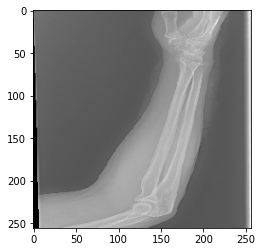

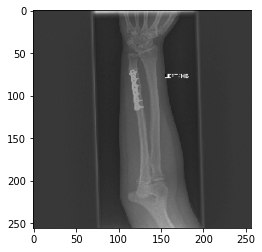

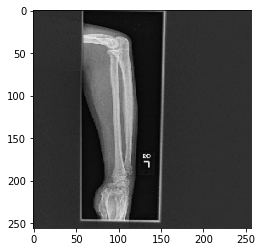

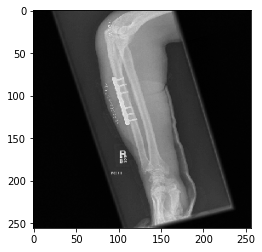

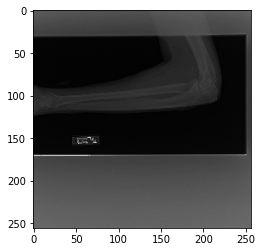

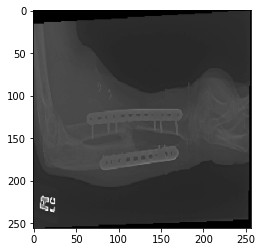

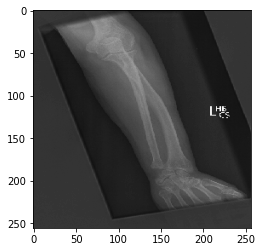

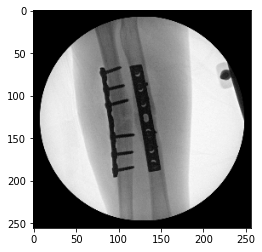

In [95]:
# Generate a random batch of images and labels
images, labels = next(train_generator)

# Display the images from the batch
num_images = images.shape[0]

for i in range(num_images):
   plt.imshow(images[i], cmap='gray')
   plt.show()

In [96]:
# each batch
print(images.shape)
# every image in each batch
print(train_generator.image_shape)

(8, 256, 256, 1)
(256, 256, 1)


In [97]:
# Define the CNN model
model = models.Sequential()

# Convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the feature maps
model.add(layers.Flatten())

# Dense layers
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 32)      320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 30, 30, 128)     

In [98]:

model.fit(train_generator, steps_per_epoch=229, epochs=6,
                    validation_data=valid_generator, validation_steps=229, verbose=1)

Epoch 1/6
229/229 [==============================] - 156s 668ms/step - loss: 0.6633 - accuracy: 0.6384 - val_loss: 0.6946 - val_accuracy: 0.5316
Epoch 2/6
229/229 [==============================] - 146s 639ms/step - loss: 0.6443 - accuracy: 0.6488
Epoch 3/6
229/229 [==============================] - 146s 639ms/step - loss: 0.6093 - accuracy: 0.6784
Epoch 4/6
229/229 [==============================] - 146s 636ms/step - loss: 0.5012 - accuracy: 0.7534
Epoch 5/6
229/229 [==============================] - 146s 638ms/step - loss: 0.3405 - accuracy: 0.8471
Epoch 6/6
229/229 [==============================] - 146s 637ms/step - loss: 0.1663 - accuracy: 0.9332


In [99]:
loss, accuracy = model.evaluate(valid_generator)

print("Test loss:", loss)
print("Test accuracy:", accuracy)

38/38 [==============================] - 5s 133ms/step - loss: 1.9605 - accuracy: 0.5615
Test loss: 1.9605185985565186
Test accuracy: 0.5614618062973022


In [100]:
model.fit(train_generator, steps_per_epoch=229, epochs=2,
                    validation_data=valid_generator, validation_steps=229, verbose=1)

Epoch 1/2
229/229 [==============================] - 150s 654ms/step - loss: 0.0848 - accuracy: 0.9721 - val_loss: 3.0184 - val_accuracy: 0.5615
Epoch 2/2
229/229 [==============================] - 147s 641ms/step - loss: 0.0482 - accuracy: 0.9896


In [101]:
loss, accuracy = model.evaluate(valid_generator)

print("Test loss:", loss)
print("Test accuracy:", accuracy)

38/38 [==============================] - 5s 134ms/step - loss: 3.4917 - accuracy: 0.5714
Test loss: 3.491652250289917
Test accuracy: 0.5714285969734192


In [102]:
model.fit(train_generator, steps_per_epoch=229, epochs=2,
                    validation_data=valid_generator, validation_steps=229, verbose=1)

Epoch 1/2
229/229 [==============================] - 153s 669ms/step - loss: 0.0117 - accuracy: 0.9973 - val_loss: 4.0875 - val_accuracy: 0.5847
Epoch 2/2
229/229 [==============================] - 148s 646ms/step - loss: 0.0068 - accuracy: 0.9989


In [103]:
loss, accuracy = model.evaluate(valid_generator)

print("Test loss:", loss)
print("Test accuracy:", accuracy)

38/38 [==============================] - 5s 137ms/step - loss: 4.6435 - accuracy: 0.5648
Test loss: 4.643476486206055
Test accuracy: 0.564784049987793


In [104]:
model.fit(train_generator, steps_per_epoch=229, epochs=2,
                    validation_data=valid_generator, validation_steps=229, verbose=1)

Epoch 1/2
229/229 [==============================] - 152s 661ms/step - loss: 0.0258 - accuracy: 0.9940 - val_loss: 3.1920 - val_accuracy: 0.5681
Epoch 2/2
229/229 [==============================] - 146s 638ms/step - loss: 0.0179 - accuracy: 0.9978


In [105]:
loss, accuracy = model.evaluate(valid_generator)

print("Test loss:", loss)
print("Test accuracy:", accuracy)

38/38 [==============================] - 5s 132ms/step - loss: 4.0524 - accuracy: 0.5482
Test loss: 4.0524492263793945
Test accuracy: 0.5481727719306946


In [106]:
model.fit(train_generator, steps_per_epoch=229, epochs=2,
                    validation_data=valid_generator, validation_steps=229, verbose=1)

Epoch 1/2
229/229 [==============================] - 154s 671ms/step - loss: 0.0053 - accuracy: 0.9984 - val_loss: 4.7211 - val_accuracy: 0.5648
Epoch 2/2
229/229 [==============================] - 140s 610ms/step - loss: 0.0028 - accuracy: 0.9995


In [107]:
loss, accuracy = model.evaluate(valid_generator)

print("Test loss:", loss)
print("Test accuracy:", accuracy)

38/38 [==============================] - 5s 131ms/step - loss: 4.9413 - accuracy: 0.5581
Test loss: 4.9412641525268555
Test accuracy: 0.5581395626068115


In [112]:
model.fit(train_generator, steps_per_epoch=229, epochs=2,
                    validation_data=valid_generator, validation_steps=229, verbose=1)

Epoch 1/2
229/229 [==============================] - 155s 678ms/step - loss: 0.0034 - accuracy: 0.9995 - val_loss: 4.9206 - val_accuracy: 0.5615
Epoch 2/2
229/229 [==============================] - 146s 639ms/step - loss: 1.4459e-04 - accuracy: 1.0000


In [113]:
loss, accuracy = model.evaluate(valid_generator)

print("Test loss:", loss)
print("Test accuracy:", accuracy)

38/38 [==============================] - 5s 141ms/step - loss: 5.2555 - accuracy: 0.5615
Test loss: 5.255453109741211
Test accuracy: 0.5614618062973022


In [114]:
model.fit(train_generator, steps_per_epoch=229, epochs=2,
                    validation_data=valid_generator, validation_steps=229, verbose=1)

Epoch 1/2
229/229 [==============================] - 153s 666ms/step - loss: 8.6118e-05 - accuracy: 1.0000 - val_loss: 5.4511 - val_accuracy: 0.5581
Epoch 2/2
229/229 [==============================] - 148s 647ms/step - loss: 5.9952e-05 - accuracy: 1.0000


In [115]:
loss, accuracy = model.evaluate(valid_generator)

print("Test loss:", loss)
print("Test accuracy:", accuracy)

38/38 [==============================] - 5s 131ms/step - loss: 5.6067 - accuracy: 0.5548
Test loss: 5.606661319732666
Test accuracy: 0.554817259311676


In [ ]:
model.save('./model.h5')

In [2]:
model.predict()

In [108]:
# # Path to the directory containing the image dataset
# positive_train = train_positive_dir

# #Load our dataset of positive train images and their corresponding labels
# positive_train_images = []

# # Iterate over each file in the dataset directory
# for filename in os.listdir(positive_train):
#     # Check if the file is an image file
#     if filename.endswith(('.jpg', '.jpeg', '.png')):
#         # Construct the full file path
#         file_path = os.path.join(positive_train, filename)
        
#         # Read the image using OpenCV
#         iterate_image = cv2.imread(file_path)
#         iterate_gray = cv2.cvtColor(iterate_image, cv2.COLOR_BGR2GRAY)

#         positive_train_images.append(iterate_gray)

In [109]:
# # Path to the directory containing the image dataset
# negative_train = train_negative_dir

# #Load our dataset of negative train images and their corresponding labels
# negative_train_images = []

# # Iterate over each file in the dataset directory
# for filename in os.listdir(negative_train):
#     # Check if the file is an image file
#     if filename.endswith(('.jpg', '.jpeg', '.png')):
#         # Construct the full file path
#         file_path = os.path.join(negative_train, filename)
        
#         # Read the image using OpenCV
#         iterate_image = cv2.imread(file_path)
#         iterate_gray = cv2.cvtColor(iterate_image, cv2.COLOR_BGR2GRAY)

#         negative_train_images.append(iterate_gray)

In [110]:
# # Path to the directory containing the image dataset
# negative_train = train_negative_dir

# #Load our dataset of negative train images and their corresponding labels
# negative_train_images = []

# # Iterate over each file in the dataset directory
# for filename in os.listdir(negative_train):
#     # Check if the file is an image file
#     if filename.endswith(('.jpg', '.jpeg', '.png')):
#         # Construct the full file path
#         file_path = os.path.join(negative_train, filename)
        
#         # Read the image using OpenCV
#         iterate_image = cv2.imread(file_path)
#         iterate_gray = cv2.cvtColor(iterate_image, cv2.COLOR_BGR2GRAY)

#         negative_train_images.append(iterate_gray)

In [111]:
# # Path to the directory containing the image dataset
# negative_train = train_negative_dir

# #Load our dataset of negative train images and their corresponding labels
# negative_train_images = []

# # Iterate over each file in the dataset directory
# for filename in os.listdir(negative_train):
#     # Check if the file is an image file
#     if filename.endswith(('.jpg', '.jpeg', '.png')):
#         # Construct the full file path
#         file_path = os.path.join(negative_train, filename)
        
#         # Read the image using OpenCV
#         iterate_image = cv2.imread(file_path)
#         iterate_gray = cv2.cvtColor(iterate_image, cv2.COLOR_BGR2GRAY)

#         negative_train_images.append(iterate_gray)